In [1]:
import numpy as np

from qiskit import IBMQ, Aer
from qiskit.providers.ibmq import least_busy
from qiskit import QuantumCircuit, transpile, assemble

from qiskit.visualization import plot_histogram
from qiskit_textbook.tools import simon_oracle

<ipython-input-4-4dfbabc15a4b>:11: DeprecationWarning: The QuantumCircuit.__iadd__() method is being deprecated. Use the compose() (potentially with the inplace=True argument) and tensor() methods which are more flexible w.r.t circuit register compatibility.
  simon_ckt += simon_oracle(b)
C:\Users\sarth\anaconda3\lib\site-packages\qiskit\circuit\quantumcircuit.py:876: DeprecationWarning: The QuantumCircuit.extend() method is being deprecated. Use the compose() (potentially with the inplace=True argument) and tensor() methods which are more flexible w.r.t circuit register compatibility.
  return self.extend(rhs)


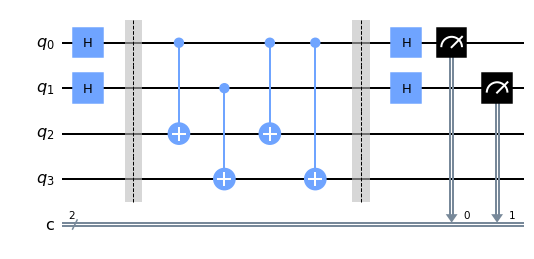

In [4]:
#Framework
b = '11'
n = len(b)
simon_ckt = QuantumCircuit(2*n, n)

#Hadamard to all in 1st half
simon_ckt.h(range(n))
simon_ckt.barrier()

#Add oracle
simon_ckt += simon_oracle(b)
simon_ckt.barrier()

#Hadamard to all in first register
simon_ckt.h(range(n))

#measure
simon_ckt.measure(range(n), range(n))

simon_ckt.draw('mpl')

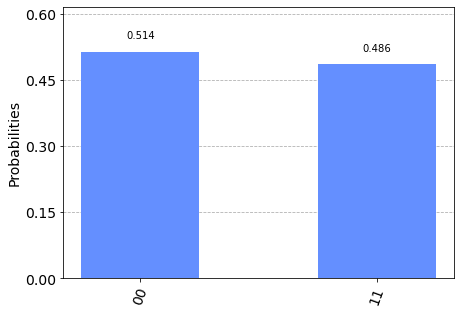

In [16]:
#run on simulator

qasm_sim = Aer.get_backend('qasm_simulator')
shots = 10
qobj = assemble(simon_ckt, qasm_sim)
results = qasm_sim.run(qobj).result()
counts = results.get_counts()
plot_histogram(counts)

In [17]:
def bdotz(b, z):
    accum = 0
    for i in range (len(b)):
        accum += int(b[i]) * int(z[i])
    
    return accum%2

In [18]:
for z in counts:
    print("{}.{} = {} (mod 2)".format(b, z, bdotz(b, z)))

11.11 = 0 (mod 2)
11.00 = 0 (mod 2)


In [19]:
IBMQ.load_account()
provider = IBMQ.get_provider(hub='ibm-q')
provider.backends()
backend = least_busy(provider.backends(filters=lambda x: x.configuration().n_qubits <= 5 and
                                   x.configuration().n_qubits >= 2 and
                                   not x.configuration().simulator and x.status().operational==True))
print("least busy backend: ", backend)

least busy backend:  ibmq_quito


In [20]:
# Run our circuit on the least busy backend. Monitor the execution of the job in the queue
from qiskit.tools.monitor import job_monitor

shots = 1024
transpiled_circuit = transpile(simon_ckt, backend)
qobj = assemble(transpiled_circuit, shots=shots)
job = backend.run(qobj)

job_monitor(job, interval=2)

<ipython-input-20-51235e4fe339>:7: DeprecationWarning: Passing a Qobj to Backend.run is deprecated and will be removed in a future release. Please pass in circuits or pulse schedules instead.
  job = backend.run(qobj)


Job Status: job has successfully run


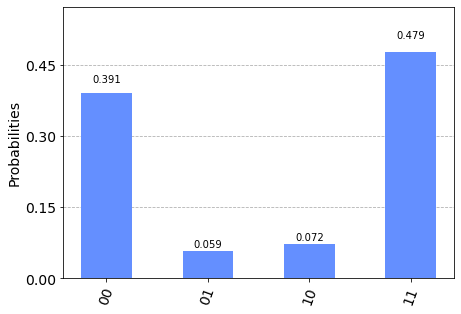

In [21]:
results = job.result()
answer = results.get_counts()

plot_histogram(answer)